In [1]:
# Author: GreHiDeL
#MyGithub Repo: https://github.com/Dre-AsiliVentures

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from datetime import date,timedelta

In [3]:
link="https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
#btc = pd.read_csv(link, skiprows=1, usecols=['date', 'close','open'])
btc = pd.read_csv(link, skiprows=1)

In [4]:
today=date.today()
today_date=today.strftime("%Y-%m-%d")
#diff_date=timedelta(date=10)#Timedelta for difference between two dates
btc=btc.loc[:today_date]

In [5]:
rows_count=len(btc.index)
#Conventional 70-30 rule for training and validation data set"""
train_rows=int(0.7*rows_count)
test_rows=int(0.3*rows_count)
data= btc.tail(rows_count) 
data_test=btc.head(test_rows) # Validate the data model with 30% of the data

print(data)

print(data_test)

               Unix        Date   Symbol      Open      High       Low  \
0     1697932800000  2023-10-22  BTCUSDT  29909.80  30248.00  29640.00   
1     1697846400000  2023-10-21  BTCUSDT  29669.05  30379.99  29464.77   
2     1697760000000  2023-10-20  BTCUSDT  28713.71  30207.55  28578.29   
3     1697673600000  2023-10-19  BTCUSDT  28320.00  28916.89  28100.66   
4     1697587200000  2023-10-18  BTCUSDT  28395.91  28982.36  28142.87   
...             ...         ...      ...       ...       ...       ...   
2019  1523491200000  2018-04-12  BTCUSDT   6953.78   8012.23   6743.20   
2020  1523404800000  2018-04-11  BTCUSDT   6839.56   6990.00   6787.00   
2021  1523318400000  2018-04-10  BTCUSDT   6781.55   6890.00   6656.00   
2022  1523232000000  2018-04-09  BTCUSDT   7011.04   7185.00   6611.00   
2023  1523145600000  2018-04-08  BTCUSDT   6895.81   7109.13   6880.00   

         Close    Volume BTC   Volume USDT  tradecount  
0     29992.46  22852.545630  6.838548e+08     1008299

In [6]:
btc_open_data=data.Open.values.reshape(-1,1)
btc_close_data=data.Close.values.reshape(-1,1)
btc_close_test_data=data_test.Close.values.reshape(-1,1)
print(btc_close_data)

[[29992.46]
 [29909.8 ]
 [29669.04]
 ...
 [ 6843.9 ]
 [ 6782.72]
 [ 7018.  ]]


In [7]:
#Decision Tree Regressor
data_model=DecisionTreeRegressor(max_depth=100).fit(btc_open_data,btc_close_data)
DTR_data_predict=data_model.predict(btc_close_test_data)
print(DTR_data_predict)

[29884.92 29992.46 29909.8  29669.04 28713.71 28320.   28395.91 28500.78
 27154.15 26852.48 26862.   26759.63 26875.52 27390.12 27590.12 27917.05
 27956.67 27931.09 27410.39 27778.57 27426.46 27494.51 27992.57 26962.56
 26906.96 27021.39 26372.99 26221.67 26304.81 26248.38 26575.96 26580.14
 26568.08 27125.   27210.26 26762.51 26527.51 26559.67 26600.   26522.73
 26222.   25840.1  25162.52 25841.61 25901.61 25910.5  26255.   25759.95
 25792.1  25826.02 25971.21 25869.51 25805.05 25940.78 27299.99 27716.34
 26120.   26101.77 26017.37 26060.01 26180.05 26432.72 26056.   26126.92
 26189.99 26100.01 26054.   26623.41 28730.51 29200.   29430.93 29303.84
 29430.17 29426.03 29455.75 29581.99 29770.42 29211.06 29088.42 29072.13
 29113.99 29193.64 29186.01 29705.99 29232.25 29281.09 29352.9  29314.14
 29222.78 29351.96 29228.91 29176.5  30083.75 29794.   29901.72 29800.
 29909.21 29859.13 30138.   30231.99 30289.52 30312.01 31454.23 30380.
 30622.1  30411.57 30160.71 30284.63 30344.7  29895.43 

# Technique 2 K-Nearest Neighbour Regression

In [8]:
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # Scaling for the training data
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np

 X= Training Data, Y= Target values

Text(0, 0.5, 'Error')

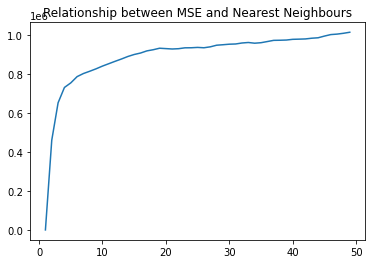

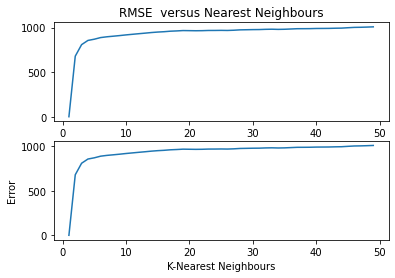

In [9]:
# Choosing the K-Nearest Neighbour based on loop
mse_error=[]
rmse_error=[]
x_range=range(1,50)# K-Nearest neighbour (range of 1-50)
for k in x_range:
    KNN_model = KNeighborsRegressor(n_neighbors=k).fit(btc_open_data,btc_close_data)
    closeData_predict=KNN_model.predict(btc_open_data)
    mse_error.append(mean_squared_error(btc_close_data,closeData_predict))
    rmse_error.append(sqrt(mean_squared_error(btc_close_data,closeData_predict)))
plt.title("Relationship between MSE and Nearest Neighbours")
plt.plot(x_range,mse_error, label='MSE')
figure, axis =plt.subplots(2)  # Minimum is two but we need one. 
axis[0].plot(x_range,rmse_error)
axis[0].set_title("RMSE  versus Nearest Neighbours")
axis[1].plot(x_range,rmse_error)
axis[0].set_title("RMSE  versus Nearest Neighbours") # The other is redundant
plt.xlabel("K-Nearest Neighbours")
plt.ylabel("Error")

The graph above helps in determining the nearest neighbours below. 
#So by observing the appropriate K-Nearest Neighbour the target price predictions can proceed normally

In [10]:
KNN_model = KNeighborsRegressor(n_neighbors=4).fit(btc_open_data,btc_close_data) # Fit(X,Y)
closeData_KNN_predict = KNN_model.predict(btc_open_data)  # Y_predict=Predict (X)
print(closeData_KNN_predict)

[[30239.89  ]
 [29879.1025]
 [28909.46  ]
 ...
 [ 6944.975 ]
 [ 6985.435 ]
 [ 6897.325 ]]


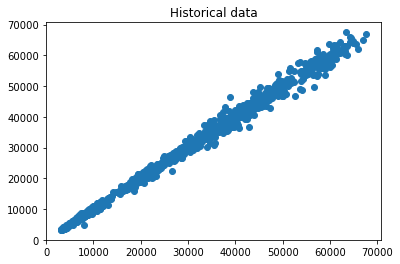

In [11]:
plt.title("Historical data")
plt.scatter(btc_open_data,btc_close_data, label='Historical data')

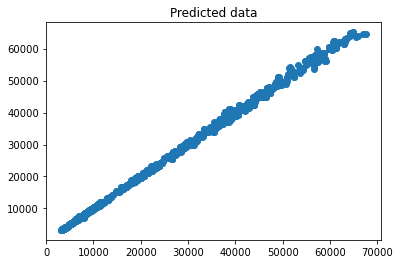

In [12]:
plt.title("Predicted data")
plt.scatter(btc_open_data,closeData_KNN_predict, label='Historical data')

In [13]:
MSE=mean_squared_error(btc_close_data,closeData_KNN_predict)
print("Mean Squared Error:" +str(MSE))
RMSE=sqrt(mean_squared_error(btc_close_data,closeData_KNN_predict))
print("RMSE:" +str(RMSE))
R2_Score=r2_score(btc_close_data,closeData_KNN_predict)
print("R2_Score:" +str(R2_Score))

Mean Squared Error:732388.4183775784
RMSE:855.7969492686792
R2_Score:0.9971817546903111


In [14]:
# Target Price
Target_Price_data=btc_close_data[0]
Target_Price_predicted=closeData_KNN_predict[0]
print("The original Target_Price was :"+str(Target_Price_data))
print("The predicted Target_Price :"+str(Target_Price_predicted))

The original Target_Price was :[29992.46]
The predicted Target_Price :[30239.89]
